## Introduction

The goal of this project is to analyse Fantasy Football data from the 2021/22 Premier League season, particularly looking at how position influences Fantasy Football performance.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions this project has sought to answer:

 - What footballing position scored the most points on average?
 - What is the distribution of points scored by position?
 - What position is the most valuable?
 - Is there a relationship between the team a player plays for and their output? Are the differences significant?
 - Is there a relationship between playing home and away and a player's output? Are the differences significant?
 
**Data sources:**

All data has been taken from the open Fantasy Football APIs: https://fantasy.premierleague.com/api/bootstrap-static/ and https://fantasy.premierleague.com/api/element-summary/%7Belement_id%7D/.

### Project Goals

As a Fantasy Football manager, the goal is to maximise point returns across the season. Although data has become more important in recent years, the main driver behind decision making is still human intuition. Unfortunately, everyone has a tendency to be biaised towards certain players or teams, which potentially limits the potential of the Fantasy Football manager. The goal of this project is to analyse the 2021/22 season to understand what were the key drivers for points scoring and the relationship between positions, teams and the home/away factor in the outcome. To this end, some of the questions posed are:

 - What footballing position scored the most points on average?
 - What is the distribution of points scored by position?
 - What position is the most valuable?
 - Is there a relationship between the team a player plays for and their output? Are the differences significant?
 - Is there a relationship between playing home and away and a player's output? Are the differences significant?
 
### Data

The data comes from two Fantasy Football API endpoints: https://fantasy.premierleague.com/api/bootstrap-static/ and https://fantasy.premierleague.com/api/element-summary/%7Belement_id%7D/. The former contains general information about players and their performance across the season. The latter contains more detailed information about individual players, looking at their historical fixtures and the stats from specific matches they played in.

### Analysis

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the differences in points scored are statistically significant. Some of the key metrics that will be computed include: 

1. Distributions
1. averages
1. relationship between teams
1. points per position

### Evaluation

This last part will check if the output of the analysis corresponds to the questions first set to be answered (in the goals section). This section will also reflect on what has been learned through the process, and if any of the questions were unable to be answered. This could also include limitations or if any of the analysis could have been done using different methodologies.


### Import Python Modules

Firstly, the Python Modules to be used in the project are imported:



In [1]:
import requests
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Access the API using requests

Next, the requests package is used to access the general information API, transform the request into a JSON object and inspect the keys of the JSON object, which will be used to construct the DataFrames.

In [2]:
url_general = 'https://fantasy.premierleague.com/api/bootstrap-static/'

r  = requests.get(url_general)
json = r.json()
print(json.keys())

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])


### Build the DataFrames from the API request

Now that the keys have been identified, the relevant DataFrames for the analysis can be constructed using Pandas. The important keys are 'elements', 'teams' and 'element_types'. 'elements' contains all the player information, 'teams' the team information and 'element_types' the positional information.

In [3]:
elements = pd.DataFrame(json['elements'])
teams = pd.DataFrame(json['teams'])
elements_types = pd.DataFrame(json['element_types'])
elements.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text
0,100.0,100.0,80201,0,0,-5,5,1,1,1.0,...,598,60,442,30,NaN,,NaN,,NaN,
1,0.0,0.0,115918,0,0,0,0,0,1,0.0,...,490,19,541,55,NaN,,NaN,,NaN,
2,0.0,0.0,47431,0,0,-2,2,0,3,0.0,...,732,306,732,306,NaN,,NaN,,NaN,
3,0.0,0.0,54694,0,0,-4,4,0,4,0.0,...,57,25,176,33,NaN,,NaN,,NaN,
4,100.0,100.0,58822,0,0,-3,3,0,2,2.2,...,322,105,263,87,2.0,,3.0,,NaN,


In [4]:
elements.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [5]:
elements_types.head()

,id,plural_name,plural_name_short,singular_name,singular_name_short,squad_select,squad_min_play,squad_max_play,ui_shirt_specific,sub_positions_locked,element_count
0,1,Goalkeepers,GKP,Goalkeeper,GKP,2,1,1,True,[12],83
1,2,Defenders,DEF,Defender,DEF,5,3,5,False,[],247
2,3,Midfielders,MID,Midfielder,MID,5,2,5,False,[],308
3,4,Forwards,FWD,Forward,FWD,3,1,3,False,[],98


In [6]:
teams.head()

,code,draw,form,id,loss,name,played,points,position,short_name,...,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,...,None,False,0,1250,1270,1150,1210,1190,1220,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,...,None,False,0,1100,1100,1140,1110,1090,1090,2
2,94,0,None,3,0,Brentford,0,0,0,BRE,...,None,False,0,1060,1070,1120,1150,1080,1120,130
3,36,0,None,4,0,Brighton,0,0,0,BHA,...,None,False,0,1100,1090,1160,1160,1100,1120,131
4,90,0,None,5,0,Burnley,0,0,0,BUR,...,None,False,0,1060,1060,1080,1130,1060,1100,43


Each table contains a lot of data. The next set of steps reduces each DataFrame to only those columns required for the analysis.

**elements**

This leaves the player, which team they played for, their position and a few numeric variables indicating their season performance:

In [7]:
elements_reduced = elements[['second_name','id','element_type','team','now_cost','selected_by_percent','total_points','value_season','minutes']]
elements_reduced.head()

,second_name,id,element_type,team,now_cost,selected_by_percent,total_points,value_season,minutes
0,Leno,1,1,1,45,0.8,10,2.2,360
1,Rúnarsson,2,1,1,40,0.5,0,0.0,0
2,Borges Da Silva,3,3,1,63,0.1,0,0.0,0
3,Aubameyang,4,4,1,96,1.2,44,4.6,1036
4,Soares,5,2,1,42,0.4,34,8.1,1391


**element types**

This just leaves the position and the associated ID:

In [8]:
elements_types_reduced = elements_types[['id','singular_name']]
elements_types_reduced.head()

,id,singular_name
0,1,Goalkeeper
1,2,Defender
2,3,Midfielder
3,4,Forward


**teams**

This leaves the name of each Premier league team and their associated ID:

In [9]:
teams_reduced = teams[['id','name']]
teams_reduced.head(20)

,id,name
0,1,Arsenal
1,2,Aston Villa
2,3,Brentford
3,4,Brighton
4,5,Burnley
5,6,Chelsea
6,7,Crystal Palace
7,8,Everton
8,9,Leicester
9,10,Leeds


### Cleaning the data

On the surface, the data looks like it is ready to be analysed but it should first be checked to ensure that is the case:

In [10]:
elements_reduced.dtypes

second_name            object
id                      int64
element_type            int64
team                    int64
now_cost                int64
selected_by_percent    object
total_points            int64
value_season           object
minutes                 int64
dtype: object

Interestingly, there are two columns that look numerical but are coming back as objects. These need to be converted into floats so that analysis can be performed on them:

In [11]:
elements_reduced = elements_reduced.astype({'selected_by_percent':float})
elements_reduced = elements_reduced.astype({'value_season':float})
elements_reduced.dtypes

second_name             object
id                       int64
element_type             int64
team                     int64
now_cost                 int64
selected_by_percent    float64
total_points             int64
value_season           float64
minutes                  int64
dtype: object

Next, there are many players in the list who have played 0 minutes this season, some of which can be seen in the table above. These must be removed so as not to skew the data. This will be taken one step further to remove players who haven't played at least 1800 minutes (20 games or just over half the season) so as to smooth the data as much as possible:

In [12]:
elements_reduced_half_season = elements_reduced[elements_reduced['minutes'] > 1800].reset_index(drop = True)
elements_reduced_half_season.head()

,second_name,id,element_type,team,now_cost,selected_by_percent,total_points,value_season,minutes
0,Xhaka,7,3,1,48,0.4,58,12.1,2265
1,Partey,15,3,1,50,0.2,71,14.2,2027
2,Tierney,16,2,1,49,4.7,106,21.6,1916
3,Smith Rowe,21,3,1,57,10.1,125,21.9,1909
4,Saka,22,3,1,67,29.1,174,26.0,2901


Currently, there are 3 tables and the team names and positions in the elements table are only IDs. Consequently, these should be merged so that the data can more easily analysed:

In [13]:
elements_merged = pd.merge(pd.merge(elements_reduced_half_season,elements_types_reduced,left_on = 'element_type',right_on= 'id'),teams_reduced,left_on = 'team',right_on = 'id')
elements_merged = elements_merged[['second_name','id_x','now_cost','selected_by_percent','total_points','value_season','minutes','singular_name','name']]
elements_merged.head()

,second_name,id_x,now_cost,selected_by_percent,total_points,value_season,minutes,singular_name,name
0,Xhaka,7,48,0.4,58,12.1,2265,Midfielder,Arsenal
1,Partey,15,50,0.2,71,14.2,2027,Midfielder,Arsenal
2,Smith Rowe,21,57,10.1,125,21.9,1909,Midfielder,Arsenal
3,Saka,22,67,29.1,174,26.0,2901,Midfielder,Arsenal
4,Ødegaard,558,56,6.1,123,22.0,2692,Midfielder,Arsenal


Finally, the headers should be changed to make them as clear as possible for the final analysis:

In [14]:
elements_final = elements_merged.rename(columns = {'second_name': 'name', 'id_x': 'player_id', 'now_cost': 'cost','value_season':'value','singular_name':'position','name':'club'})
elements_final.head()

,name,player_id,cost,selected_by_percent,total_points,value,minutes,position,club
0,Xhaka,7,48,0.4,58,12.1,2265,Midfielder,Arsenal
1,Partey,15,50,0.2,71,14.2,2027,Midfielder,Arsenal
2,Smith Rowe,21,57,10.1,125,21.9,1909,Midfielder,Arsenal
3,Saka,22,67,29.1,174,26.0,2901,Midfielder,Arsenal
4,Ødegaard,558,56,6.1,123,22.0,2692,Midfielder,Arsenal


### Create the additional detailed player dataframe

At this point, the API endpoint containing detailed player information hasn't been looked at. This is because it requires an input parameter - {element_id} - to bring back information on a specific player. The input parameter is the equivalent of player_id in the 'elements_final' DataFrame, meaning that said player_id can be used in the request to bring back the more detailed statistics on each player that the analysis is interested in using a loop:

In [15]:
all_players = {}
player_id_list = elements_final['player_id'].to_list()
for i in player_id_list:
    player_url = 'https://fantasy.premierleague.com/api/element-summary/{element_id}/'.format(element_id = i)
    r = requests.get(player_url)
    all_players[i] = r.json()
    

The 'all_players' dictionary has a key of the player_id and value of their historical statistics, which are also dictionaries, containing the following keys: 'fixtures', 'history', 'history_past'. In order to convert these stats into a DataFrame, another loop is created for the keys we are interested in (in this case just 'history' as this contains all the fixtures played this season) and the values are appended into an empty DataFrame:

In [16]:
player_history = pd.DataFrame()

for player in all_players:
    history = all_players[player]['history']
    history_df = pd.DataFrame(history)
    player_history = player_history.append(history_df)

player_history.head()


,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,...,bps,influence,creativity,threat,ict_index,value,transfers_balance,selected,transfers_in,transfers_out
0,7,1,3,2,False,2021-08-13T19:00:00Z,2,0,1,90,...,13,15.2,24.7,5.0,4.5,50,0,61422,0,0
1,7,18,6,2,True,2021-08-22T15:30:00Z,0,2,2,90,...,12,18.0,26.0,4.0,4.8,50,-6158,71783,7841,13999
2,7,24,12,-2,False,2021-08-28T11:30:00Z,5,0,3,34,...,-5,0.0,0.3,0.0,0.0,50,-7688,68971,5786,13474
3,7,31,15,0,True,2021-09-11T14:00:00Z,1,0,4,0,...,0,0.0,0.0,0.0,0.0,49,-27550,41136,541,28091
4,7,43,5,0,False,2021-09-18T14:00:00Z,0,1,5,0,...,0,0.0,0.0,0.0,0.0,49,-7002,35411,333,7335


In [17]:
player_history.columns

Index(['element', 'fixture', 'opponent_team', 'total_points', 'was_home',
       'kickoff_time', 'team_h_score', 'team_a_score', 'round', 'minutes',
       'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards',
       'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity',
       'threat', 'ict_index', 'value', 'transfers_balance', 'selected',
       'transfers_in', 'transfers_out'],
      dtype='object')

Again, there are too many columns that are not relevant for the analysis. These are removed:

In [18]:
player_history_reduced = player_history[['element','opponent_team','total_points','was_home','team_h_score','team_a_score','round','minutes','value']]
player_history_reduced.head()

,element,opponent_team,total_points,was_home,team_h_score,team_a_score,round,minutes,value
0,7,3,2,False,2,0,1,90,50
1,7,6,2,True,0,2,2,90,50
2,7,12,-2,False,5,0,3,34,50
3,7,15,0,True,1,0,4,0,49
4,7,5,0,False,0,1,5,0,49


And the IDs for element and opponent team are replaced with their respective names and the player's club and position are added through a series of merges, followed by a final renaming to make the DataFrame as clear as possible:

In [19]:
player_history_merged = pd.merge(pd.merge(player_history_reduced,teams_reduced,left_on = 'opponent_team',right_on = 'id'),elements_final,left_on = 'element',right_on = 'player_id')
player_history_merged.columns

Index(['element', 'opponent_team', 'total_points_x', 'was_home',
       'team_h_score', 'team_a_score', 'round', 'minutes_x', 'value_x', 'id',
       'name_x', 'name_y', 'player_id', 'cost', 'selected_by_percent',
       'total_points_y', 'value_y', 'minutes_y', 'position', 'club'],
      dtype='object')

In [20]:
player_history_dropped = player_history_merged.drop(['opponent_team','id','player_id','cost','selected_by_percent','total_points_y','value_y','minutes_y'], axis = 1)
player_history_final = player_history_dropped.rename(columns = {'element': 'player_id','total_points_x': 'points_scored','was_home':'home','team_h_score':'home_goals','team_a_score':'away_goals','minutes_x':'minutes','value_x':'cost','name_x':'opponent','name_y':'player_name'})
player_history_final = player_history_final.sort_values(['player_id','round']).reset_index(drop = True)
player_history_final.head(40)

,player_id,points_scored,home,home_goals,away_goals,round,minutes,cost,opponent,player_name,position,club
0,7,2,False,2,0,1,90,50,Brentford,Xhaka,Midfielder,Arsenal
1,7,2,True,0,2,2,90,50,Chelsea,Xhaka,Midfielder,Arsenal
2,7,-2,False,5,0,3,34,50,Man City,Xhaka,Midfielder,Arsenal
3,7,0,True,1,0,4,0,49,Norwich,Xhaka,Midfielder,Arsenal
4,7,0,False,0,1,5,0,49,Burnley,Xhaka,Midfielder,Arsenal
5,7,2,True,3,1,6,81,49,Spurs,Xhaka,Midfielder,Arsenal
6,7,0,False,0,0,7,0,49,Brighton,Xhaka,Midfielder,Arsenal
7,7,0,True,2,2,8,0,49,Crystal Palace,Xhaka,Midfielder,Arsenal
8,7,0,True,3,1,9,0,49,Aston Villa,Xhaka,Midfielder,Arsenal
9,7,0,False,0,2,10,0,49,Leicester,Xhaka,Midfielder,Arsenal


## Analysis

Having sorted and cleaned the data, this section will look into uncovering answers into the original questions posed. The first task requires an investigation into the positions and how they influence the output of the players. Below are the mean scores per position:

In [21]:
mean_by_position = elements_final.groupby('position')['total_points'].mean().reset_index()
mean_by_position.sort_values('total_points',ascending = False)

,position,total_points
2,Goalkeeper,123.263158
1,Forward,113.578947
3,Midfielder,108.760000
0,Defender,94.783784


Interestingly, the Goalkeeper position has the highest mean points scored; however, what about the distribution of the data?

<AxesSubplot:xlabel='total_points', ylabel='Count'>

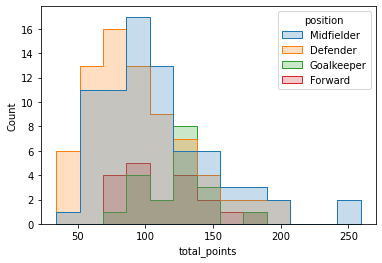

In [22]:
sns.histplot(data = elements_final, x = 'total_points', hue = 'position',element = 'step')

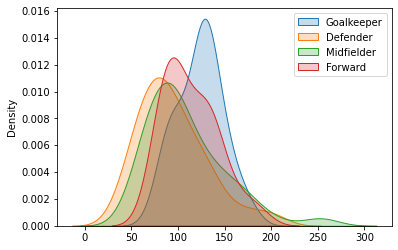

In [23]:
sns.kdeplot(elements_final.total_points[elements_final['position'] == 'Goalkeeper'].values,shade = True)
sns.kdeplot(elements_final.total_points[elements_final['position'] == 'Defender'].values,shade = True)
sns.kdeplot(elements_final.total_points[elements_final['position'] == 'Midfielder'].values,shade = True)
sns.kdeplot(elements_final.total_points[elements_final['position'] == 'Forward'].values,shade = True)
plt.legend(['Goalkeeper','Defender','Midfielder','Forward'])

<AxesSubplot:xlabel='position', ylabel='total_points'>

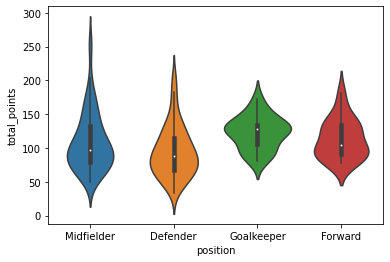

In [24]:
sns.violinplot(data = elements_final, x = 'position', y = 'total_points')

Now it is clear that, although the Goalkeeper position has the largest average and follows a pretty much normal distribution around the mean, the other positions have greater ranges and are right skewed. This means that the points potential is greater than that of the Goalkeeper, especially so for the Midfielder. Another reason why the Goalkeeper might have a generally higher average is that, even with a 20 game minimum, the rotation will be greater in outfield positions. The next stage of analysis will try to normalise this by looking at the points per minute earned:

In [25]:
elements_final['points_per_minute'] = elements_final['total_points'] /elements_final['minutes']
elements_final

,name,player_id,cost,selected_by_percent,total_points,value,minutes,position,club,points_per_minute
0,Xhaka,7,48,0.4,58,12.1,2265,Midfielder,Arsenal,0.025607
1,Partey,15,50,0.2,71,14.2,2027,Midfielder,Arsenal,0.035027
2,Smith Rowe,21,57,10.1,125,21.9,1909,Midfielder,Arsenal,0.065479
3,Saka,22,67,29.1,174,26.0,2901,Midfielder,Arsenal,0.059979
4,Ødegaard,558,56,6.1,123,22.0,2692,Midfielder,Arsenal,0.045691
...,...,...,...,...,...,...,...,...,...,...
182,Saïss,431,48,2.3,109,22.7,2706,Defender,Wolves,0.040281
183,Cabral Semedo,437,48,1.6,94,19.6,2131,Defender,Wolves,0.044111
184,Kilman,439,45,1.3,106,23.6,2688,Defender,Wolves,0.039435
185,Malheiro de Sá,475,52,8.5,145,27.9,3240,Goalkeeper,Wolves,0.044753


In [26]:
mean_points_per_min_position = elements_final.groupby('position')['points_per_minute'].mean().reset_index()
mean_points_per_min_position

,position,points_per_minute
0,Defender,0.037651
1,Forward,0.045518
2,Goalkeeper,0.041380
3,Midfielder,0.044930


<AxesSubplot:xlabel='points_per_minute', ylabel='Count'>

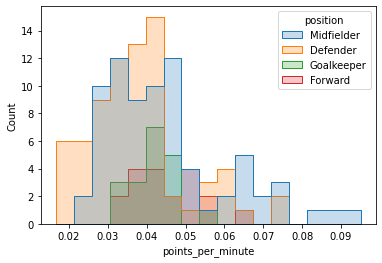

In [27]:
sns.histplot(data = elements_final, x = 'points_per_minute', hue = 'position',element = 'step')

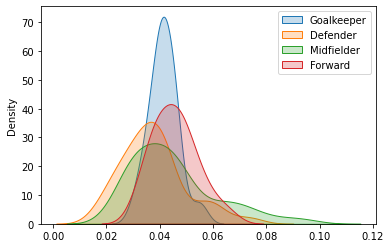

In [28]:
sns.kdeplot(elements_final.points_per_minute[elements_final['position'] == 'Goalkeeper'].values,shade = True)
sns.kdeplot(elements_final.points_per_minute[elements_final['position'] == 'Defender'].values,shade = True)
sns.kdeplot(elements_final.points_per_minute[elements_final['position'] == 'Midfielder'].values,shade = True)
sns.kdeplot(elements_final.points_per_minute[elements_final['position'] == 'Forward'].values,shade = True)
plt.legend(['Goalkeeper','Defender','Midfielder','Forward'])

<AxesSubplot:xlabel='position', ylabel='points_per_minute'>

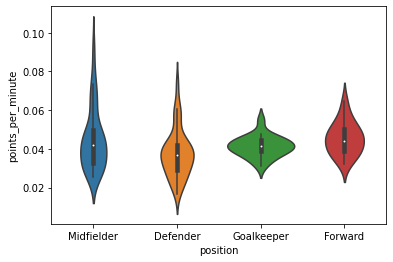

In [29]:
sns.violinplot(data = elements_final, x = 'position', y = 'points_per_minute')

From a points per minute perspective, we can now see that defenders are the worst performers though they have a larger range than goalkeepers and forwards, meaning the top defenders are potentially worth investing in. Forwards have the highest average but midfielders display greater range, again suggesting that the top performing assets in this class are the most important in the game. 

The problem in Fantasy Football though is that you don't have unlimited funds and the team must be composed of high performing, expensive players and 'value' points accumulated per unit cost. First, what are the average values per position?

In [30]:
mean_value_per_position = elements_final.groupby('position')['value'].mean().reset_index()
mean_value_per_position

,position,value
0,Defender,18.966216
1,Forward,16.178947
2,Goalkeeper,24.247368
3,Midfielder,17.852000


Interstingly, of the outfield players, defenders appear to offer the greatest value and goalkeepers are by far the most valuable assets in the game.

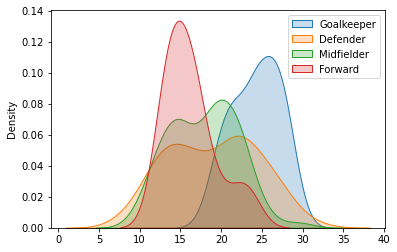

In [31]:
sns.kdeplot(elements_final.value[elements_final['position'] == 'Goalkeeper'].values,shade = True)
sns.kdeplot(elements_final.value[elements_final['position'] == 'Defender'].values,shade = True)
sns.kdeplot(elements_final.value[elements_final['position'] == 'Midfielder'].values,shade = True)
sns.kdeplot(elements_final.value[elements_final['position'] == 'Forward'].values,shade = True)
plt.legend(['Goalkeeper','Defender','Midfielder','Forward'])

<AxesSubplot:xlabel='position', ylabel='value'>

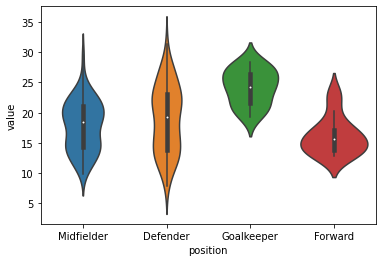

In [32]:
sns.violinplot(data = elements_final, x = 'position', y = 'value')

By looking at the distributions, further differences between the positions can be identified. Whilst goalkeepers do offer the highest value on average, their range is small, suggesting that most starting players will offer decent value regardless of who you pick. Forwards are similarly clustered with a small range but defenders and midfielders are very different: they have the greatest potential for value but also the highest chance of costing the fantasy manager points. This suggests that getting these positions right is absolutely critical to the success of the team. 

This season, the top value defenders and midfielders were Matip and Bowen respectively, neither of whom were tipped as top performers before the season started. It's also interesting that, looking through the top 5 of each list, apart from Cancelo, there is no other representation from the top 2 clubs in the league, which would indicate that a blend of players from different clubs is important to success.

As for the worst performers in defence, Williams from Norwich stands out. Seen as an enable due to his low price point, ironically he didn't actually provide much value to the team given how low his overall points tally was. On the midfielders side, there is £189 million worth of talent in the bottom five value players, something that possibly no fantasy manager would have predicted before the start of the season...

In [33]:
elements_final[elements_final['position'] == 'Defender'].sort_values('value',ascending = False)

,name,player_id,cost,selected_by_percent,total_points,value,minutes,position,club,points_per_minute
96,Matip,224,52,9.3,163,31.3,2700,Defender,Liverpool,0.060370
181,Coady,429,48,13.8,137,28.5,3271,Defender,Wolves,0.041883
108,Cancelo,256,72,41.3,200,27.8,3137,Defender,Man City,0.063755
57,Guéhi,477,45,2.0,123,27.3,3222,Defender,Crystal Palace,0.038175
23,Jansson,76,45,6.8,121,26.9,3231,Defender,Brentford,0.037450
...,...,...,...,...,...,...,...,...,...,...
79,Thomas,219,43,0.8,50,11.6,1911,Defender,Leicester,0.026164
125,Lascelles,299,44,0.2,45,10.2,1965,Defender,Newcastle,0.022901
69,Godfrey,179,47,0.4,45,9.6,2029,Defender,Everton,0.022178
135,Williams,290,39,4.6,36,9.2,2119,Defender,Norwich,0.016989


In [34]:
elements_final[elements_final['position'] == 'Midfielder'].sort_values('value',ascending = False)

,name,player_id,cost,selected_by_percent,total_points,value,minutes,position,club,points_per_minute
168,Bowen,420,69,13.3,204,29.6,2897,Midfielder,West Ham,0.070418
3,Saka,22,67,29.1,174,26.0,2901,Midfielder,Arsenal,0.059979
73,Maddison,212,69,15.3,168,24.3,2373,Midfielder,Leicester,0.070796
30,Trossard,64,59,2.7,141,23.9,2803,Midfielder,Brighton,0.050303
142,Ward-Prowse,341,64,5.4,152,23.8,3125,Midfielder,Southampton,0.048640
...,...,...,...,...,...,...,...,...,...,...
81,Klich,186,51,0.3,60,11.8,2066,Midfielder,Leeds,0.029042
101,Grealish,33,75,7.1,86,11.5,1910,Midfielder,Man City,0.045026
131,Gilmour,145,43,3.0,49,11.4,1852,Midfielder,Norwich,0.026458
115,Sancho,485,89,2.2,91,10.2,1894,Midfielder,Man Utd,0.048046


Now that a positional analysis has been undertaken, the next question is to understand whether the club a player plays for makes a difference to their output. Again, this will be done by looking at both points output and value. The first task is to group the relevant data by the team, as per the table below:

In [35]:
teams_analysis = elements_final.groupby('club')[['total_points','value']].mean().reset_index()
teams_analysis.sort_values('total_points',ascending = False)

,club,total_points,value
10,Liverpool,171.400000,23.080000
11,Man City,145.909091,20.009091
16,Spurs,130.444444,21.100000
5,Chelsea,126.142857,20.714286
18,West Ham,115.181818,20.172727
0,Arsenal,115.000000,21.466667
1,Aston Villa,107.700000,19.790000
6,Crystal Palace,105.333333,20.744444
19,Wolves,105.333333,20.922222
2,Brentford,101.300000,20.630000


In [36]:
teams_analysis.sort_values('value',ascending = False)

,club,total_points,value
10,Liverpool,171.400000,23.080000
0,Arsenal,115.000000,21.466667
16,Spurs,130.444444,21.100000
19,Wolves,105.333333,20.922222
6,Crystal Palace,105.333333,20.744444
5,Chelsea,126.142857,20.714286
2,Brentford,101.300000,20.630000
18,West Ham,115.181818,20.172727
11,Man City,145.909091,20.009091
1,Aston Villa,107.700000,19.790000


It certainly looks like the club makes a significant difference in output. Liverpool top both the average points and value charts for this season and Norwich are bottom of both. There also look to be differences between average points scored and value with certain clubs. Manchester United, for example, are roughly mid table for points output but bottom for value. This is possibly not suprising given their assets are generally priced pretty high and they have had a poor season; Manchester City, however, have not but their assets are only mid table for value, whilst being second in the list for average points scored. This may be down, in part, to the famous Pep roulette and certainly indicates that the Fantasy Manager should be wary of choosing players from this team.

The question now is, are the differences between the clubs actually statistically significant. The next part of the analysis will run an ANOVA and Tukey range test to determine this but the first check is a violin plot to visualise the distributions:

<AxesSubplot:xlabel='club', ylabel='total_points'>

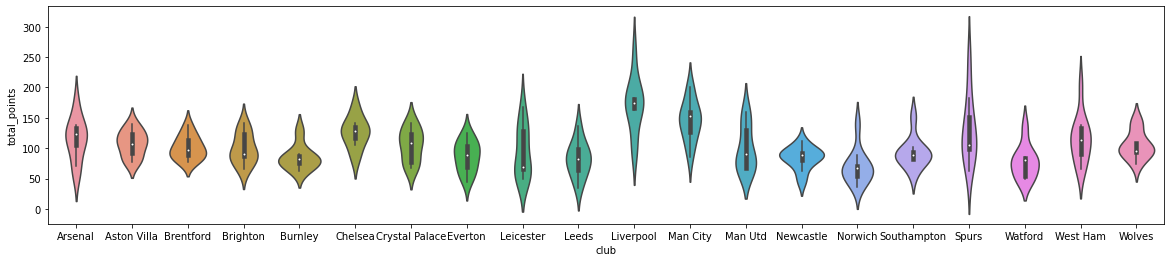

In [37]:
plt.figure(figsize = (20,4))
sns.violinplot(data = elements_final, x = 'club', y = 'total_points')

<AxesSubplot:xlabel='club', ylabel='value'>

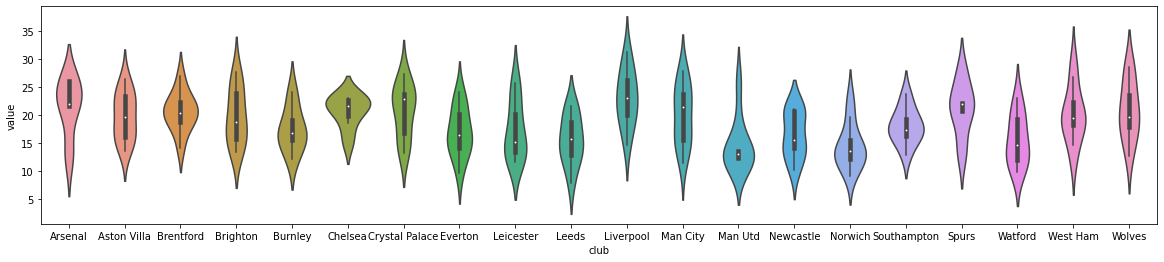

In [38]:
plt.figure(figsize = (20,4))
sns.violinplot(data = elements_final, x = 'club', y = 'value')

The disributions for each club look very different. Liverpool, for example, have a very large range in both areas, whereas Norwich looks more clustered, especially in the total points output. Running an ANOVA test will help to prove whether these differences are significant or not:

In [39]:
from scipy.stats import f_oneway

points_ars = elements_final.total_points[elements_final['club'] == 'Arsenal'].values
points_asv = elements_final.total_points[elements_final['club'] == 'Aston Villa'].values
points_bre = elements_final.total_points[elements_final['club'] == 'Brentford'].values
points_bri = elements_final.total_points[elements_final['club'] == 'Brighton'].values
points_bur = elements_final.total_points[elements_final['club'] == 'Burnley'].values
points_che = elements_final.total_points[elements_final['club'] == 'Chelsea'].values
points_cyp = elements_final.total_points[elements_final['club'] == 'Crystal Palace'].values
points_evrt = elements_final.total_points[elements_final['club'] == 'Everton'].values
points_leic = elements_final.total_points[elements_final['club'] == 'Leicester'].values
points_lee = elements_final.total_points[elements_final['club'] == 'Leeds'].values
points_liv = elements_final.total_points[elements_final['club'] == 'Liverpool'].values
points_mcy = elements_final.total_points[elements_final['club'] == 'Man City'].values
points_mtd = elements_final.total_points[elements_final['club'] == 'Man Utd'].values
points_new = elements_final.total_points[elements_final['club'] == 'Newcastle'].values
points_nor = elements_final.total_points[elements_final['club'] == 'Norwich'].values
points_sou = elements_final.total_points[elements_final['club'] == 'Southampton'].values
points_tot = elements_final.total_points[elements_final['club'] == 'Spurs'].values
points_wat = elements_final.total_points[elements_final['club'] == 'Watford'].values
points_wst = elements_final.total_points[elements_final['club'] == 'West Ham'].values
points_wol = elements_final.total_points[elements_final['club'] == 'Wolves'].values

fstat, pval = f_oneway(points_ars, points_asv, points_bre,points_bri,points_bur,points_che,points_cyp,points_evrt,points_leic,points_lee,points_liv,points_mcy,points_mtd,points_new,points_nor,points_sou,points_tot,points_wat,points_wst,points_wol)
pval

5.5624782191097816e-11

The low p-value suggests that the differences are significant between clubs but which ones in particular. The next step is a Tukey test to determine that:

In [40]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_results = pairwise_tukeyhsd(elements_final.total_points, elements_final.club, 0.05)
print(tukey_results)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1         group2     meandiff p-adj    lower    upper   reject
-----------------------------------------------------------------------
       Arsenal    Aston Villa     -7.3    0.9  -59.8272  45.2272  False
       Arsenal      Brentford    -13.7    0.9  -66.2272  38.8272  False
       Arsenal       Brighton -15.5556    0.9  -69.4473  38.3362  False
       Arsenal        Burnley -29.7143    0.9   -87.327  27.8984  False
       Arsenal        Chelsea  11.1429    0.9  -46.4698  68.7556  False
       Arsenal Crystal Palace  -9.6667    0.9  -63.5584  44.2251  False
       Arsenal        Everton -28.1818    0.9  -79.5656  23.2019  False
       Arsenal          Leeds    -32.7 0.7378  -85.2272  19.8272  False
       Arsenal      Leicester -20.3333    0.9  -74.2251  33.5584  False
       Arsenal      Liverpool     56.4 0.0213    3.8728 108.9272   True
       Arsenal       Man City  30.9091 0.7863  -20.4747  82.2929

Surprisingly, the differences between clubs for average points scored aren't significantly different in the majority of cases. Only Liverpool buck this trend, having signficant differences with all clubs except Chelsea, Spurs and Man City; Norwich's ouput, as opposed to expectations, is actually only significantly different to the top 3 clubs. This may be due to limited sample size (i.e. only the 21/22 season), which means that the individual players themselves have a greater influence on their points total than the team. Does this change at all when looking at value?

In [41]:
from scipy.stats import f_oneway

value_ars = elements_final.value[elements_final['club'] == 'Arsenal'].values
value_asv = elements_final.value[elements_final['club'] == 'Aston Villa'].values
value_bre = elements_final.value[elements_final['club'] == 'Brentford'].values
value_bri = elements_final.value[elements_final['club'] == 'Brighton'].values
value_bur = elements_final.value[elements_final['club'] == 'Burnley'].values
value_che = elements_final.value[elements_final['club'] == 'Chelsea'].values
value_cyp = elements_final.value[elements_final['club'] == 'Crystal Palace'].values
value_evrt = elements_final.value[elements_final['club'] == 'Everton'].values
value_leic = elements_final.value[elements_final['club'] == 'Leicester'].values
value_lee = elements_final.value[elements_final['club'] == 'Leeds'].values
value_liv = elements_final.value[elements_final['club'] == 'Liverpool'].values
value_mcy = elements_final.value[elements_final['club'] == 'Man City'].values
value_mtd = elements_final.value[elements_final['club'] == 'Man Utd'].values
value_new = elements_final.value[elements_final['club'] == 'Newcastle'].values
value_nor = elements_final.value[elements_final['club'] == 'Norwich'].values
value_sou = elements_final.value[elements_final['club'] == 'Southampton'].values
value_tot = elements_final.value[elements_final['club'] == 'Spurs'].values
value_wat = elements_final.value[elements_final['club'] == 'Watford'].values
value_wst = elements_final.value[elements_final['club'] == 'West Ham'].values
value_wol = elements_final.value[elements_final['club'] == 'Wolves'].values

fstat, pval = f_oneway(value_ars, value_asv, value_bre,value_bri,value_bur,value_che,value_cyp,value_evrt,value_leic,value_lee,value_liv,value_mcy,value_mtd,value_new,value_nor,value_sou,value_tot,value_wat,value_wst,value_wol)
pval

0.0001632104028352935

In [42]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_results = pairwise_tukeyhsd(elements_final.value, elements_final.club, 0.05)
print(tukey_results)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower    upper  reject
---------------------------------------------------------------------
       Arsenal    Aston Villa  -1.6767    0.9  -9.1955  5.8422  False
       Arsenal      Brentford  -0.8367    0.9  -8.3555  6.6822  False
       Arsenal       Brighton  -1.6778    0.9   -9.392  6.0364  False
       Arsenal        Burnley  -3.9524    0.9 -12.1992  4.2944  False
       Arsenal        Chelsea  -0.7524    0.9  -8.9992  7.4944  False
       Arsenal Crystal Palace  -0.7222    0.9  -8.4364   6.992  False
       Arsenal        Everton  -4.4576 0.7759 -11.8128  2.8976  False
       Arsenal          Leeds  -5.8467 0.3677 -13.3655  1.6722  False
       Arsenal      Leicester  -4.1889    0.9 -11.9031  3.5253  False
       Arsenal      Liverpool   1.6133    0.9  -5.9055  9.1322  False
       Arsenal       Man City  -1.4576    0.9  -8.8128  5.8976  False
       Arsenal      

Even in this case, there are very few statistically significant differences between the teams with respect to player value. Liverpool, again, are the one club who do appear to have offered significantly different value this season but that is only compared to the bottom clubs. When looking at the rest of the range, it does not appear that the team the players played for actually influenced their points output.

This is potentially even more surprising, given that value is a derivative of cost and therefore one would reasonably expect certain clubs, which have outperformed their original expectations, to offer significant value but it may be that sample size is having an influence on the test results.


The final part of the analysis will look at whether playing home vs away has had any impact on points output in the 21/22 season. First, two new dataframes are created for home and away results, filtering the results to take into account a minimum playing time of 60 minutes:

In [43]:
player_history_home = player_history_final[(player_history_final['home'] == True) & (player_history_final['minutes'] > 60)].reset_index(drop = True)
player_history_home

,player_id,points_scored,home,home_goals,away_goals,round,minutes,cost,opponent,player_name,position,club
0,7,2,True,0,2,2,90,50,Chelsea,Xhaka,Midfielder,Arsenal
1,7,2,True,3,1,6,81,49,Spurs,Xhaka,Midfielder,Arsenal
2,7,3,True,3,0,16,80,48,Southampton,Xhaka,Midfielder,Arsenal
3,7,3,True,2,0,17,90,48,West Ham,Xhaka,Midfielder,Arsenal
4,7,1,True,1,2,21,90,48,Man City,Xhaka,Midfielder,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...
2558,588,8,True,5,1,31,80,45,Newcastle,Leite de Souza Junior,Defender,Spurs
2559,588,1,True,0,1,33,90,45,Brighton,Leite de Souza Junior,Defender,Spurs
2560,588,2,True,3,1,35,90,45,Leicester,Leite de Souza Junior,Defender,Spurs
2561,588,6,True,3,0,36,90,45,Arsenal,Leite de Souza Junior,Defender,Spurs


In [44]:
player_history_away = player_history_final[(player_history_final['home'] == False) & (player_history_final['minutes'] > 60)].reset_index(drop = True)
player_history_away

,player_id,points_scored,home,home_goals,away_goals,round,minutes,cost,opponent,player_name,position,club
0,7,2,False,2,0,1,90,50,Brentford,Xhaka,Midfielder,Arsenal
1,7,1,False,2,1,15,90,48,Everton,Xhaka,Midfielder,Arsenal
2,7,4,False,1,4,18,90,48,Leeds,Xhaka,Midfielder,Arsenal
3,7,2,False,0,5,19,90,48,Norwich,Xhaka,Midfielder,Arsenal
4,7,2,False,0,1,24,90,48,Wolves,Xhaka,Midfielder,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...
2568,588,2,False,2,3,26,82,48,Man City,Leite de Souza Junior,Defender,Spurs
2569,588,6,False,1,0,26,64,48,Burnley,Leite de Souza Junior,Defender,Spurs
2570,588,5,False,0,4,32,90,45,Aston Villa,Leite de Souza Junior,Defender,Spurs
2571,588,8,False,0,0,34,85,45,Brentford,Leite de Souza Junior,Defender,Spurs


In [45]:
mean_home = np.mean(player_history_home.points_scored)
print(mean_home)
mean_away = np.mean(player_history_away.points_scored)
print(mean_away)

3.8611002731174406
3.5025262339681307


<AxesSubplot:xlabel='home', ylabel='points_scored'>

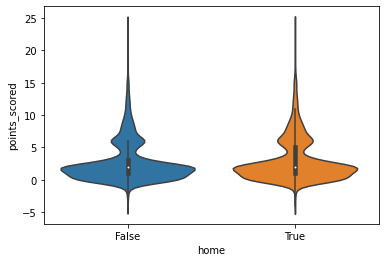

In [46]:
sns.violinplot(data = player_history_final, x = 'home', y = 'points_scored')

There is a small difference in the mean output between home and away matches, 3.86 for the former vs 3.5 for the latter. The distributions look pretty similar however, with large clusters around the mean. That being said, the IQ range for home matches is larger, suggesting that the score potential is bigger for players playing at home. The question now is the difference between the two samples signficant? Next, a two sample t-test is run to answer that question...

In [47]:
from scipy.stats import ttest_ind

home = player_history_home.points_scored
away = player_history_away.points_scored

tstat, pval = ttest_ind(home, away)
pval

9.715599591158195e-05

With a pval of 9.715599591158195e-05, there is clearly a significant difference between home and away performance, albeit not a large one on average (10%). Based on this, Fantasy Managers should take into account whether a player is playing home and away each week when selecting their side in order to maximise performance.

## Conclusions

The project was able to make several data visualizations and inferences about the performances of fantasy football players by position, team and home vs away.

This project was also able to answer some of the questions first posed in the beginning:

 - What footballing position scored the most points on average?
 
        - The goalkeeper scored the most points on averaget this season with 123 per player.

 - What is the distribution of points scored by position?

        - However, most keepers scored close to the mean, whereas midfielders and defenders points output had far bigger ranges and points potential with the right selections.

 - What position is the most valuable?
 
        - Goalkeepes, on the surface, were the most valuable. Similar to points output, however, most keepers had pretty much the same value to the team, whereas the opportunities were to be found in the defence and midfield.

 - Is there a relationship between the team a player plays for and their output? Are the differences significant?
 
        - Though the ANOVA test showed there is a relationship between team and output, the Tukey test suggested that this was only significant when comparing a small number of teams, of which the key one was Liverpool.
 
 - Is there a relationship between playing home and away and a player's output? Are the differences significant?
 
        - Yes, there is a significant difference between the two, with home players on average scoring around 10% more points per match in the 21/22 season.

## Further Research 

There are a number of areas where this project could be extended:

1. Incorporate historical data from previous seasons to see whether the observed trends have changed in the last n years
2. Incorporate underlying statistics into the analysis, such as xg, xa and xgi, to get a better understanding of the influences on points output per position
3. As identified in this study, players can be judged on their points output and value. In reality, choosing a fantasy football team is a combination of balancing the two, as better value players don't always produce the most points. The next stage of this analysis would be to find the optimal 11 players in the team of 21/22, assuming a 100 million budget and a specific formation
4. Step 2 could then be taken further to develop a model that attempts to predict a players output based on future matches and their historical form, both short and long term, with the idea being to produce an optimal team each week. The user would be constrained by the budget and a cost of -4 for any additional transfers over the ones that are freely available